In [8]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 91 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638445 sha256=239b7f44a2a33babbccca3945befd891eaf0e427338cbb12302b186275ac47a2
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [57]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
data = pd.read_csv("/content/drive/MyDrive/Data/oil.csv")
data

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [81]:
data.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

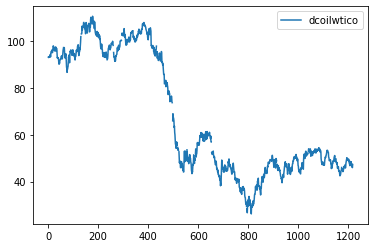

In [82]:
data.plot()

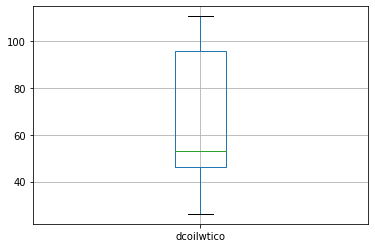

In [83]:
data.boxplot()

In [84]:
data.columns = ['ds', 'y']
data.head()

,ds,y
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [85]:
data = data.fillna(data.mode())
data.isnull().sum()

ds     0
y     42
dtype: int64

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      1218 non-null   object 
 1   y       1176 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [87]:
data['ds'] = pd.to_datetime(data['ds'])

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1218 non-null   datetime64[ns]
 1   y       1176 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [89]:
data.head()

,ds,y
0,2013-01-01,46.02
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [90]:
from fbprophet import Prophet

In [91]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [92]:
model = Prophet()

In [93]:
model.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [94]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [95]:
future_dates = model.make_future_dataframe(periods = 365)

In [96]:
future_dates.tail()

,ds
1578,2018-08-27
1579,2018-08-28
1580,2018-08-29
1581,2018-08-30
1582,2018-08-31


In [97]:
future_dates.head()

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-07


In [98]:
prediction = model.predict(future_dates)

In [99]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,85.753522,83.836790,94.865796,85.753522,85.753522,3.456288,3.456288,3.456288,7.924915,7.924915,7.924915,-4.468627,-4.468627,-4.468627,0.0,0.0,0.0,89.209811
1,2013-01-02,85.772393,84.035034,94.989748,85.772393,85.772393,3.525705,3.525705,3.525705,8.110643,8.110643,8.110643,-4.584939,-4.584939,-4.584939,0.0,0.0,0.0,89.298098
2,2013-01-03,85.791264,84.134380,94.440590,85.791264,85.791264,3.486133,3.486133,3.486133,8.178571,8.178571,8.178571,-4.692438,-4.692438,-4.692438,0.0,0.0,0.0,89.277397
3,2013-01-04,85.810135,83.695983,94.562539,85.810135,85.810135,3.327270,3.327270,3.327270,8.116604,8.116604,8.116604,-4.789334,-4.789334,-4.789334,0.0,0.0,0.0,89.137405
4,2013-01-07,85.866747,83.587502,94.143887,85.866747,85.866747,3.017649,3.017649,3.017649,8.017993,8.017993,8.017993,-5.000345,-5.000345,-5.000345,0.0,0.0,0.0,88.884396


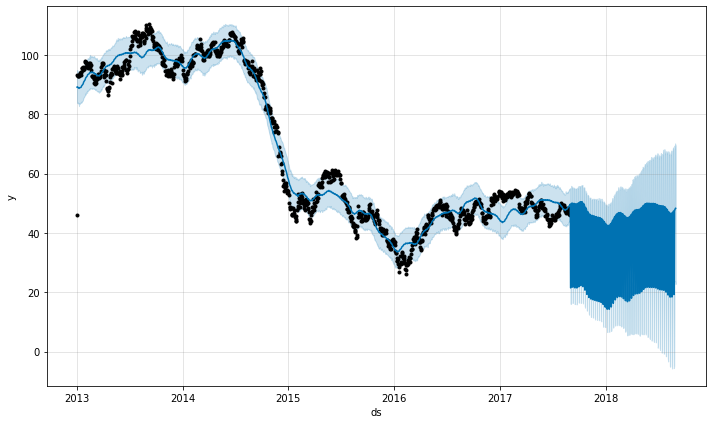

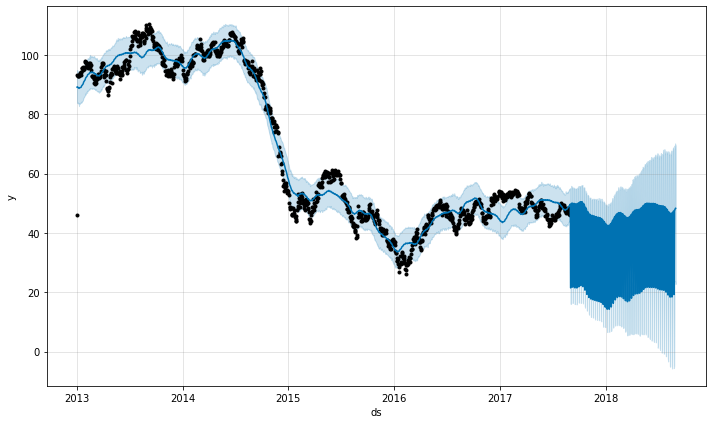

In [100]:
model.plot(prediction)

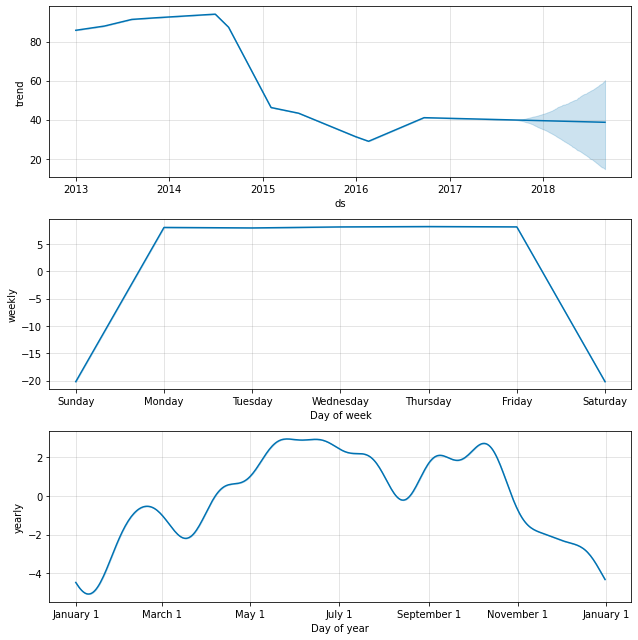

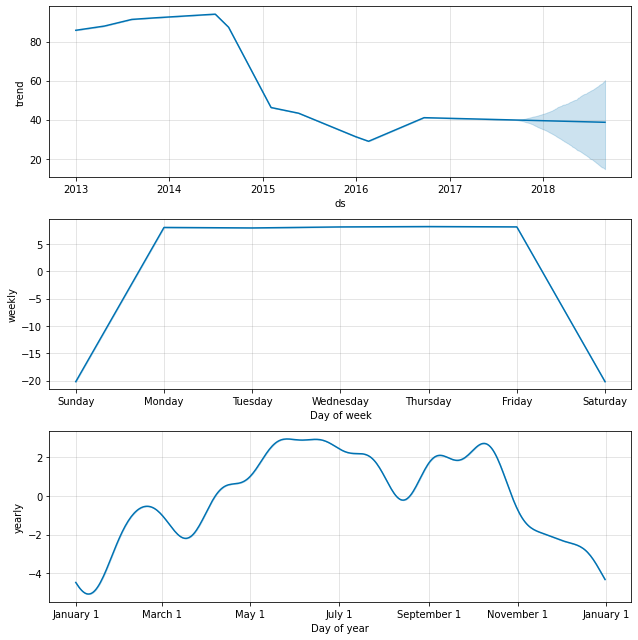

In [102]:
model.plot_components(prediction)

In [103]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial = "730 days", period = "180days", horizon= "365 days")
df_cv.head()

INFO:fbprophet:Making 4 forecasts with cutoffs between 2015-03-10 00:00:00 and 2016-08-31 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-03-11,43.297851,39.179419,47.039504,48.06,2015-03-10
1,2015-03-12,43.014595,39.269514,47.151484,47.12,2015-03-10
2,2015-03-13,42.754843,38.634367,46.947324,44.88,2015-03-10
3,2015-03-16,42.056940,38.143658,46.355736,43.93,2015-03-10
4,2015-03-17,41.331059,37.176634,45.727456,43.39,2015-03-10


In [105]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,58.110777,7.623042,5.877717,0.126391,0.110327,0.460000
1,38 days,64.679010,8.042326,6.203125,0.132776,0.118710,0.440000
2,39 days,67.130387,8.193314,6.369348,0.136323,0.127053,0.426667
3,40 days,70.133131,8.374553,6.561484,0.140097,0.128776,0.400000
4,41 days,75.643615,8.697334,6.822844,0.144501,0.131321,0.383333


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


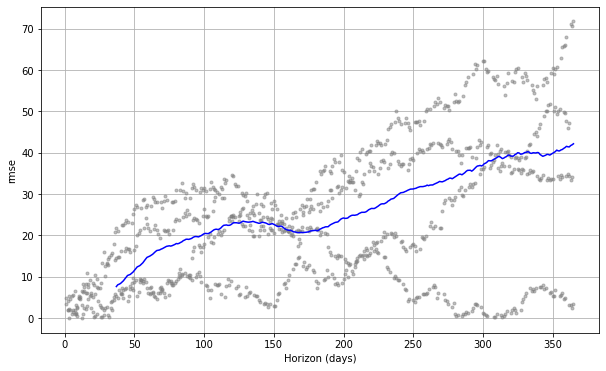

In [107]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric (df_cv, metric = 'rmse')